In [12]:
import os
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [31]:
dataset = 'C:/COVID-19_Detector_Using_Chest_X-ray/Dataset//'

In [6]:
INIT_LR = 1e-3
EPOCHS = 20
BS = 7


In [7]:
args = {}
args['dataset'] = dataset

In [8]:
args

{'dataset': 'C:/COVID-19_Detector_Using_Chest_X-ray/Dataset'}

In [27]:
import numpy as np
import cv2


ipath = list(paths.list_images(args["dataset"]))

data = []
labels = []


for ip in ipath:
    label = ip.split(os.path.sep)[-2]
    image = cv2.imread(ip)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)

data = np.array(data)/255.0
labels = np.array(labels)

In [16]:
image

array([[[69, 69, 69],
        [67, 67, 67],
        [66, 66, 66],
        ...,
        [ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[69, 69, 69],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [ 7,  7,  7],
        [10, 10, 10],
        [10, 10, 10]],

       [[68, 68, 68],
        [67, 67, 67],
        [65, 65, 65],
        ...,
        [ 7,  7,  7],
        [12, 12, 12],
        [13, 13, 13]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [18]:
image.shape

(224, 224, 3)

In [25]:
labels

[['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S0140673620303706-fx1_lrg.jpg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S0929664620300449-gr2_lrg-a.jpg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S0929664620300449-gr2_lrg-b.jpg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S0929664620300449-gr2_lrg-c.jpg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S0929664620300449-gr2_lrg-d.jpg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S1684118220300608-main.pdf-001.jpg'],
 ['C:/COVID-19_Detector_Using_Chest_X-ray/Dataset',
  'Covid',
  '1-s2.0-S1684118220300608-main.pdf-002.jpg'],
 ['C:/COVID-19_Det

In [21]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [28]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

Normal Chest X-ray Vs Covid-19 Chest X-ray


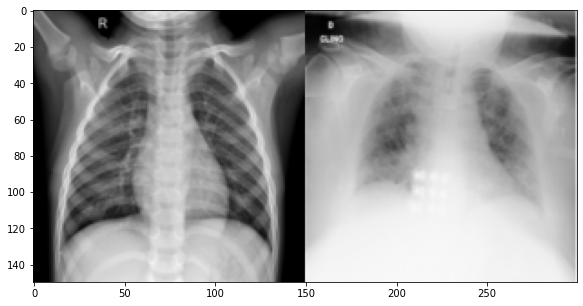

Normal Chest X-ray Vs Covid-19 Chest X-ray


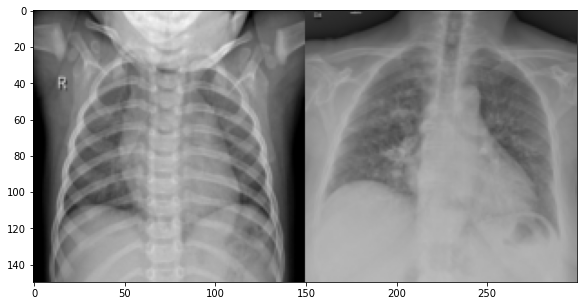

Normal Chest X-ray Vs Covid-19 Chest X-ray


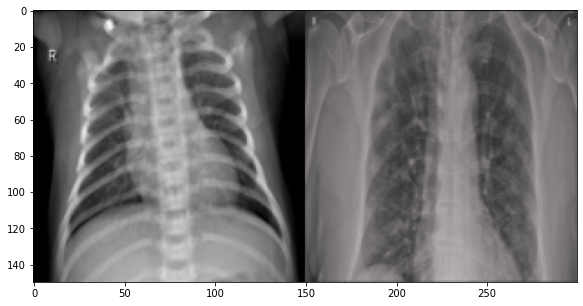

Normal Chest X-ray Vs Covid-19 Chest X-ray


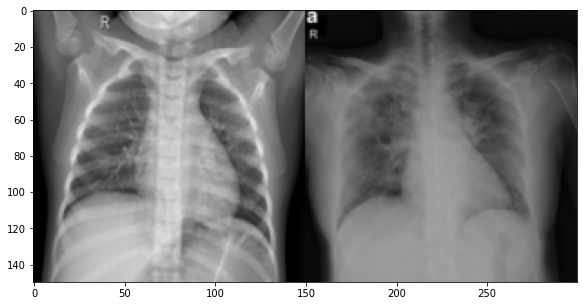

Normal Chest X-ray Vs Covid-19 Chest X-ray


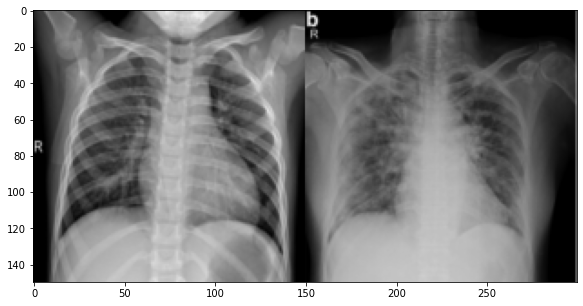

In [37]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np

Cimages = os.listdir(dataset+"Covid")
Nimages = os.listdir(dataset+"Normal")


def plotter(i):
    normal = cv2.imread(dataset+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    covid19 = cv2.imread(dataset+"Covid//"+Cimages[i])
    covid19 = skimage.transform.resize(covid19, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, covid19), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [38]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)


print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [39]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,test_size=0.30, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [40]:
X_train.shape

(140, 224, 224, 3)

In [41]:
X_train

array([[[[0.43529412, 0.43529412, 0.43529412],
         [0.43921569, 0.43921569, 0.43921569],
         [0.42352941, 0.42352941, 0.42352941],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.03529412, 0.03529412, 0.03529412],
         [0.05490196, 0.05490196, 0.05490196]],

        [[0.43137255, 0.43137255, 0.43137255],
         [0.42352941, 0.42352941, 0.42352941],
         [0.42745098, 0.42745098, 0.42745098],
         ...,
         [0.07058824, 0.07058824, 0.07058824],
         [0.07843137, 0.07843137, 0.07843137],
         [0.07843137, 0.07843137, 0.07843137]],

        [[0.41176471, 0.41176471, 0.41176471],
         [0.43921569, 0.43921569, 0.43921569],
         [0.41960784, 0.41960784, 0.41960784],
         ...,
         [0.10588235, 0.10588235, 0.10588235],
         [0.12156863, 0.12156863, 0.12156863],
         [0.12941176, 0.12941176, 0.12941176]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

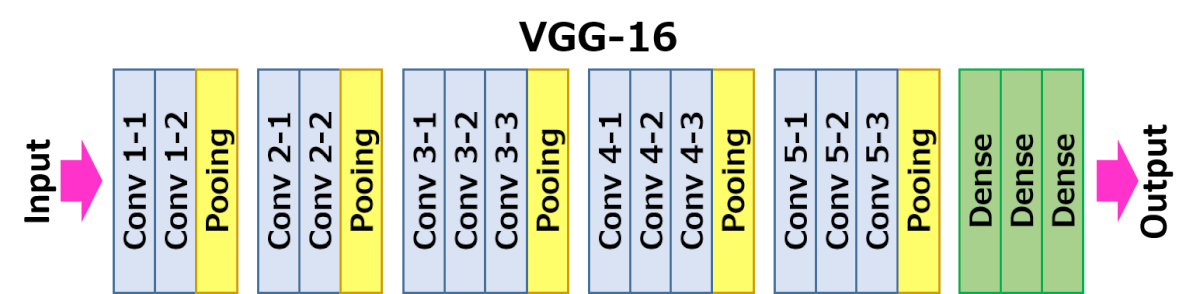

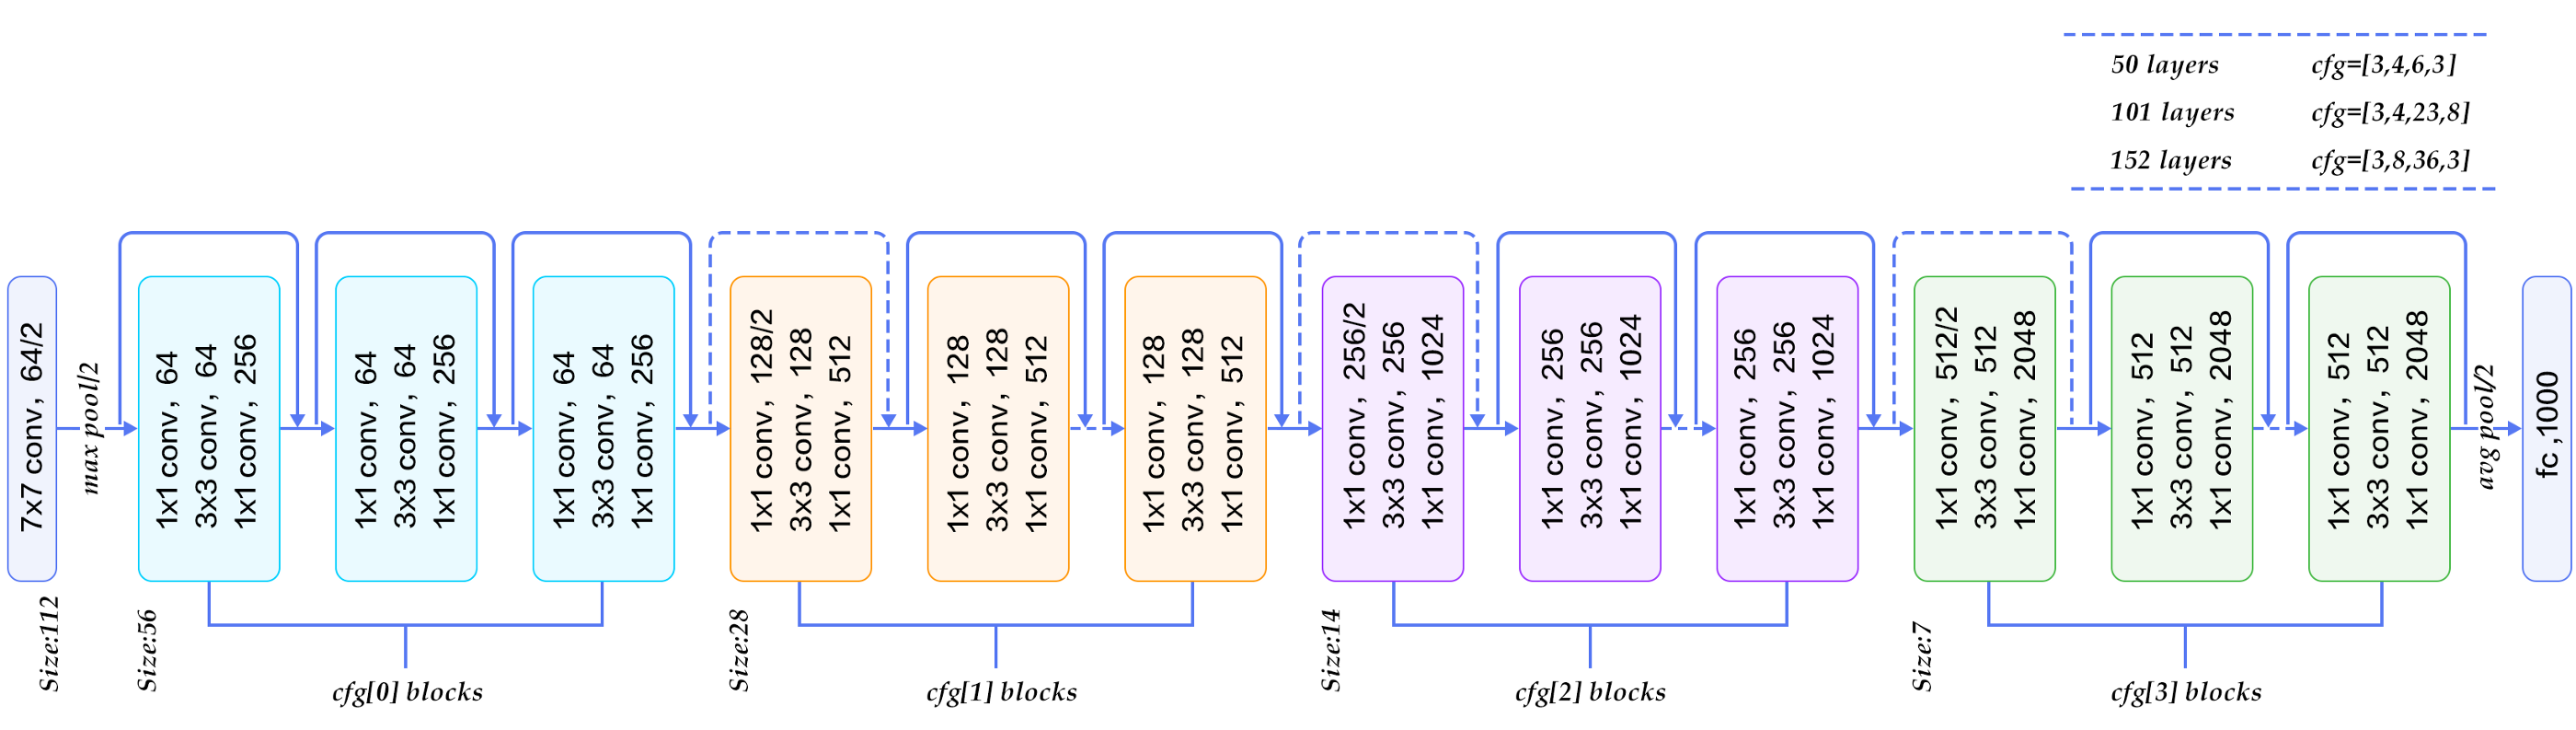

In [43]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 211s 4us/step


In [44]:
bModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [45]:
hModel = bModel.output
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

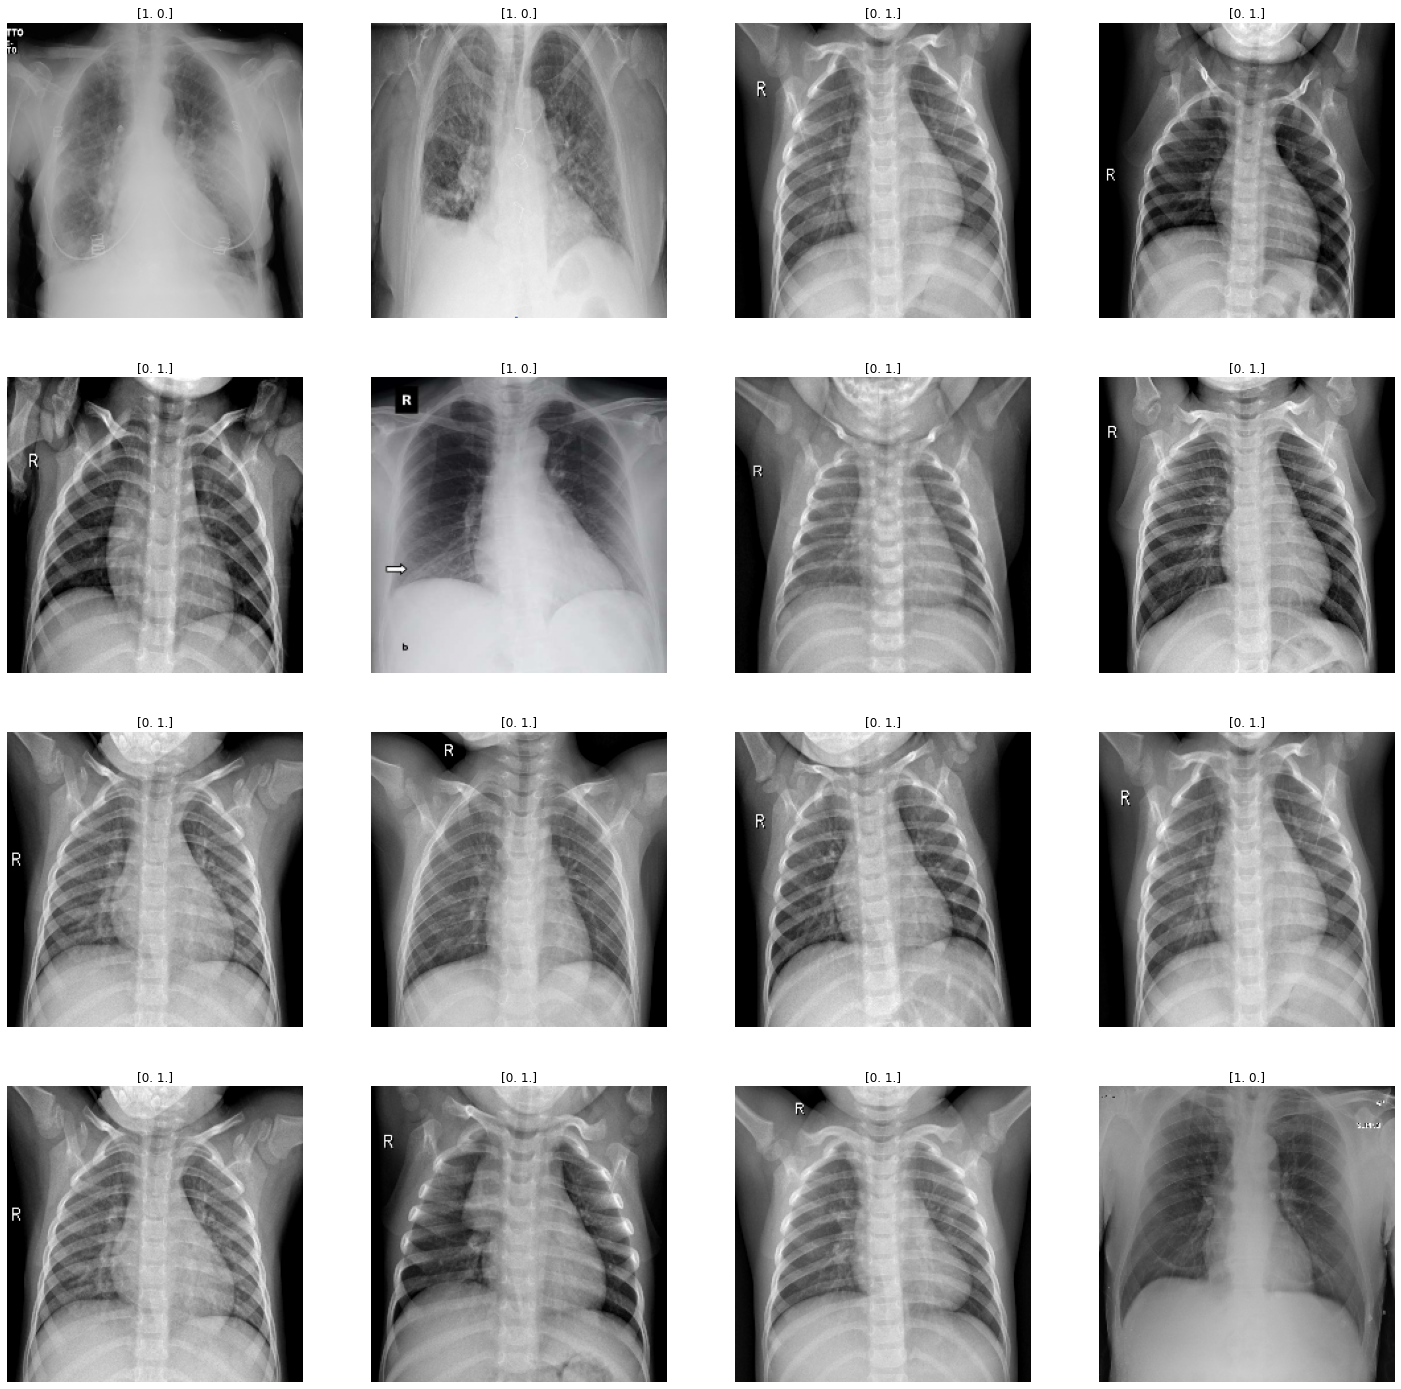

In [49]:
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.2)

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Epoch 1/20


c:\users\sunny singh\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


20/20 [==============================] - 47s 2s/step - loss: 0.0661 - accuracy: 0.9907 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 2/20
20/20 [==============================] - 50s 3s/step - loss: 0.0883 - accuracy: 1.0000 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 3/20
20/20 [==============================] - 49s 3s/step - loss: 0.0389 - accuracy: 0.9982 - val_loss: 0.0428 - val_accuracy: 1.0000
Epoch 4/20
20/20 [==============================] - 49s 3s/step - loss: 0.0737 - accuracy: 0.9876 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 50s 3s/step - loss: 0.0610 - accuracy: 0.9907 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 56s 3s/step - loss: 0.0497 - accuracy: 0.9741 - val_loss: 0.0263 - val_accuracy: 1.0000
Epoch 7/20
11/20 [===============>..............] - ETA: 18s - loss: 0.0318 - accuracy: 1.0000

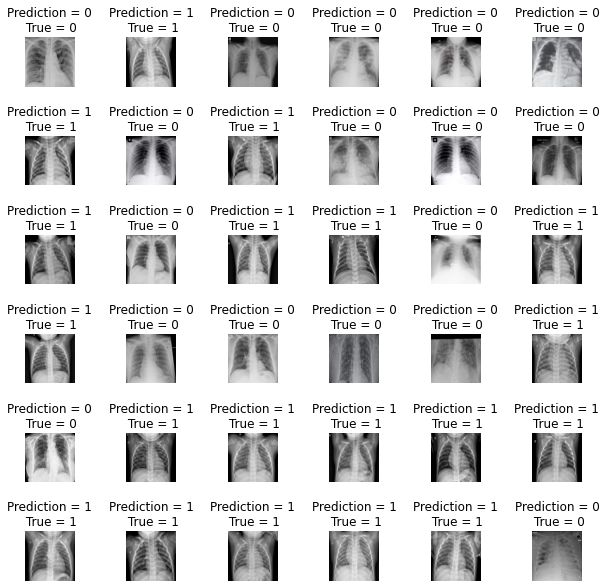

In [53]:
L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize = (10, 10))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [54]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        30
      Normal       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

1.0

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[30  0]
 [ 0 30]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


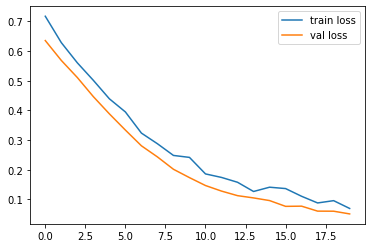

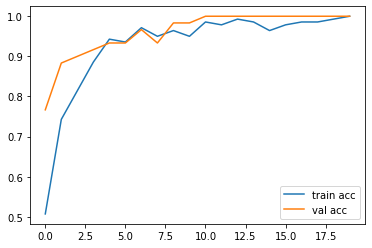

In [59]:
# loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [61]:
model.save('C:/COVID-19_Detector_Using_Chest_X-ray/model.h5')

In [90]:
import tensorflow as tf 
from keras.preprocessing import image
model = tf.keras.models.load_model('C:/COVID-19_Detector_Using_Chest_X-ray/model.h5')
from keras.applications.vgg16 import preprocess_input

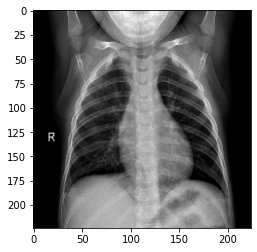

In [91]:
img = image.load_img(r'C:\COVID-19_Detector_Using_Chest_X-ray\Dataset\Normal\IM-0226-0001.jpeg', target_size=(224, 224))
imgplot = plt.imshow(img)


In [92]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


In [94]:
x

array([[[[-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         ...,
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939]],

        [[-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         ...,
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939]],

        [[-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         ...,
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939]],

        ...,

        [[-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         [-123.68 , -116.779, -103.939],
         ...,
         [-123.68 , -116.779, -103.939],
         [-123.68 , -1

Put Random Image path to Detect for corona patient


Prediction: Normal


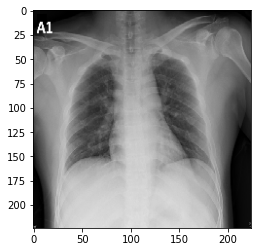

In [95]:
img = image.load_img(r'C:\COVID-19_Detector_Using_Chest_X-ray\Dataset\Covid\1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')